# **따릉이**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib
from IPython.display import display
import koreanize_matplotlib
import seaborn as sns

In [2]:
origin_train=pd.read_csv("train.csv")
origin_test=pd.read_csv("test.csv")  
data_train=origin_train.copy()
data_test=origin_test.copy()

In [3]:
data_train

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data_test

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## **도메인 지식**
1. 시간 관련 변수 (Date, Hour)
- 따릉이는 서울 도심 내 **출퇴근용 이동 수단**으로서의 성격이 강해, 하루 중 특정 시간대에 대여가 집중되는 경향
- Hour 변수는 **출퇴근 시간대** 패턴 확인에 용이
- Date 변수는 연·월·요일 등으로 분해하여 장기적인 계절성 및 요일 효과 분석에 용이

2. 기온 및 체감 환경 변수<br>
    (1) Temperature (기온)
    - 자전거 이용이 **야외 활동**이라는 점에서 체감 쾌적도와 밀접한 관련
    - 너무 낮거나 높은 기온에서는 이용이 감소하고, 적정 기온에서 대여량 증가

    (2) Humidity (습도)
    - 체감 온도 변화시키는 변수
    - 기온이 높을수록 습도가 높을 경우 불쾌감 증가

    (3) Dew point temperature (이슬점 온도)
    - 습도와 기온을 동시에 반영하는 변수
    - 값이 높을수록 공기가 습하고 후덥지근한 상태
    - Temperature, Humidity와 높은 상관관계

3. 일사량 변수 (Solar Radiation)
- 태양으로부터 지표면에 도달하는 복사 에너지의 양
- 자전거 이용 환경의 **밝기와 쾌적도** 반영
- Hour 변수와 강한 연관성
- 따릉이 이용의  **주간·야간 차이** 설명

4. 강수 및 강설 변수<br>
    (1) Rainfall (강수량)
    - 자전거 이용에 **즉각적이고 강한 부정적 영향**
    - 소량의 비만으로도 대여량이 급감하는 경향

    (2) Snowfall (적설량)
    - 자전거 이용을 거의 불가능하게 만드는 요인

5. 범주형 변수<br>
    (1) Seasons (계절)
    - 기온, 일사량, 강수, 적설 등 여러 기상 요소를 포괄적으로 반영

    (2) Holiday (공휴일 여부)
    - 출퇴근 수요 감소와 직결되는 변수
    - 따릉이가 **통근형 이동 수단**으로 활용되고 있음을 확인 가능

    (3) Functioning Day (운영 여부)
    - 운영하지 않는 날은 예측 대상이 아닌 데이터로 간주

# **EDA & 전처리**

## **데이터 구조 확인**

In [5]:
# 데이터 크기
print(data_train.shape)
print(data_test.shape)

(8040, 14)
(720, 13)


In [6]:
# 컬럼명
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# 데이터 타입
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [8]:
# 결측치 개수 확인
print(data_train.isnull().sum())
print(data_test.isnull().sum())

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64
Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64


## **Rented Bike Count**
- 해당 시간에 대여된 따릉이 대여 건수
- 오른쪽으로 긴 꼬리를 가지는 비대칭적 분포
- 대여량 0-500 구간에 가장 많이 분포
- 2000-3500 수준의 매우 높은 대여량도 존재

    => 대부분의 시간대에는 대여량이 낮거나 중간 수준이지만, 특정 시간대에 수요 급격히 증가하는 구조<br>

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

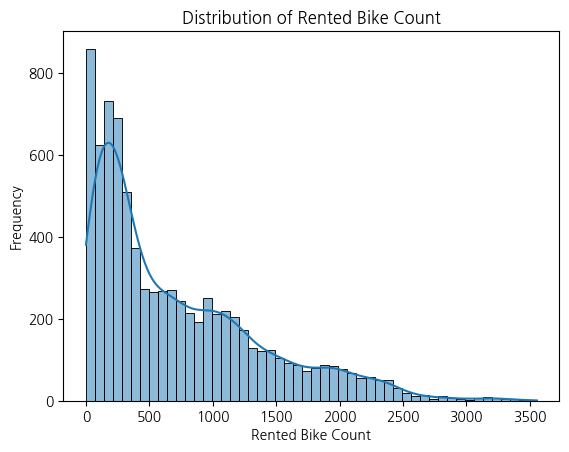

In [9]:
# 시각화
sns.histplot(data_train['Rented Bike Count'], bins=50, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')

In [10]:
data_train['Rented Bike Count'].describe()

count    8040.000000
mean      709.775995
std       657.320605
min         0.000000
25%       191.000000
50%       485.000000
75%      1080.500000
max      3556.000000
Name: Rented Bike Count, dtype: float64

## **Date**
- Train 데이터는 2017년 12월 1일부터 2018년 10월 31일까지의 데이터
- 여름에 가까워질수록 대여량이 증가하고 겨울에 가까워질수록 감소함
- 여름, 가을(5-10월)에 대여량이 많고 겨울(12-2월)에 적음
- 금요일 대여량이 가장 많고 일요일이 가장 적음

In [11]:
# datetime 변환 & 파생변수 생성
data_train['Date'] = pd.to_datetime(data_train['Date'], format='%d/%m/%Y')

data_train['Year'] = data_train['Date'].dt.year
data_train['Month'] = data_train['Date'].dt.month
data_train['Day'] = data_train['Date'].dt.day
data_train['Weekday'] = data_train['Date'].dt.weekday # 0=월요일, 6=일요일

In [12]:
# 날짜 범위 확인
print(data_train['Date'].min(), "~", data_train['Date'].max())

2017-12-01 00:00:00 ~ 2018-10-31 00:00:00


Text(0, 0.5, 'Total Rented Bike Count')

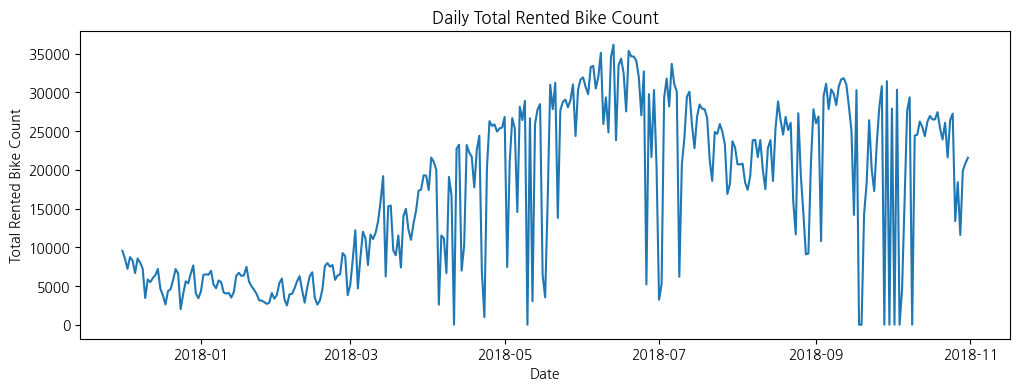

In [13]:
# 일별 총 대여량 추이
daily_count = data_train.groupby('Date')['Rented Bike Count'].sum()

plt.figure(figsize=(12,4))
plt.plot(daily_count.index, daily_count.values)
plt.title('Daily Total Rented Bike Count')
plt.xlabel('Date')
plt.ylabel('Total Rented Bike Count')

Text(0, 0.5, 'Average Rented Bike Count')

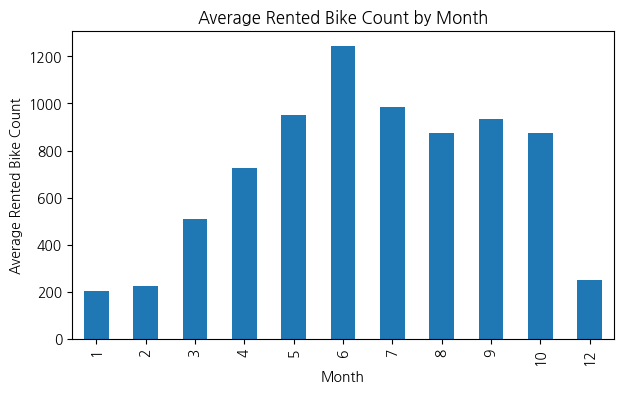

In [14]:
# 월별 평균 대여량
month_mean = data_train.groupby('Month')['Rented Bike Count'].mean()

plt.figure(figsize=(7,4))
month_mean.plot(kind='bar')
plt.title('Average Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')

Text(0.5, 1.0, 'Monthly Bike Rental Distribution')

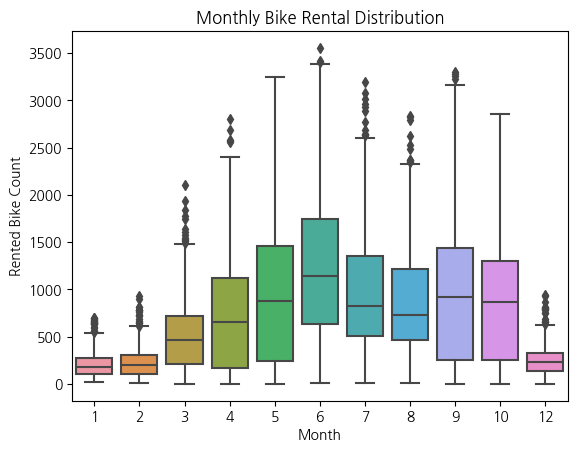

In [15]:
# 월별 대여량 분포
sns.boxplot(x='Month', y='Rented Bike Count', data=data_train)
plt.title('Monthly Bike Rental Distribution')

Text(0, 0.5, 'Average Rented Bike Count')

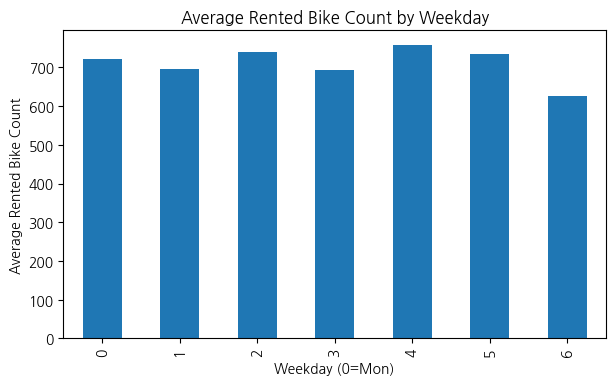

In [16]:
# 요일별 평균 대여량
weekday_mean = data_train.groupby('Weekday')['Rented Bike Count'].mean()

plt.figure(figsize=(7,4))
weekday_mean.plot(kind='bar')
plt.title('Average Rented Bike Count by Weekday')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Average Rented Bike Count')

Text(0.5, 1.0, 'Rental Count by Weekday')

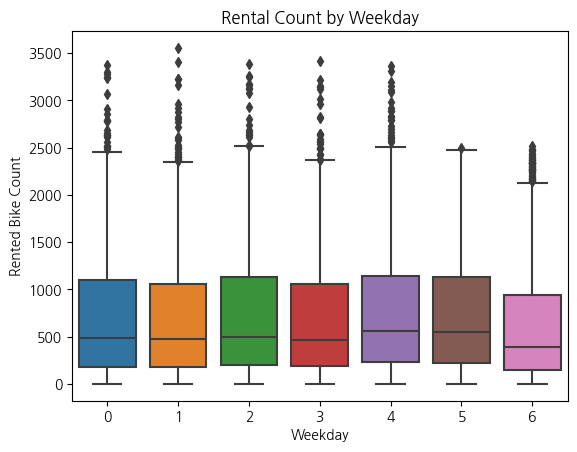

In [17]:
# 요일별 대여량 분포
sns.boxplot(x='Weekday', y='Rented Bike Count', data=data_train)
plt.title('Rental Count by Weekday')

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

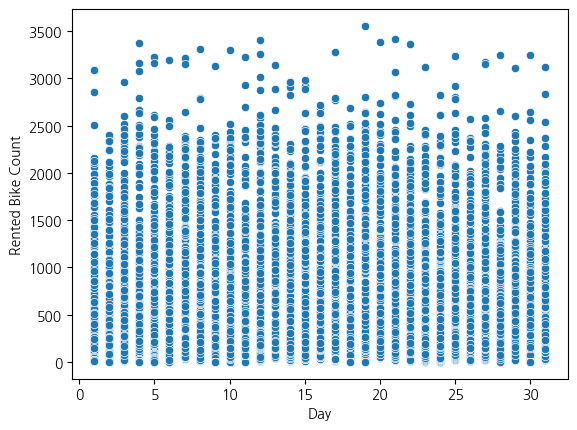

In [18]:
# 일자별 대여량 분포 -> 패턴X, 제거
sns.scatterplot(x='Day', y='Rented Bike Count', data=data_train)

## **Hour**
- 출근 시간대(07-09시)와 퇴근 시간대(17-19시)에 대여량이 높은 반면, 새벽 시간대(02-05시)에 가장 낮음
- 평일에는 출퇴근 시간대에 대여량이 높고, 주말에는 낮 시간대에 높음

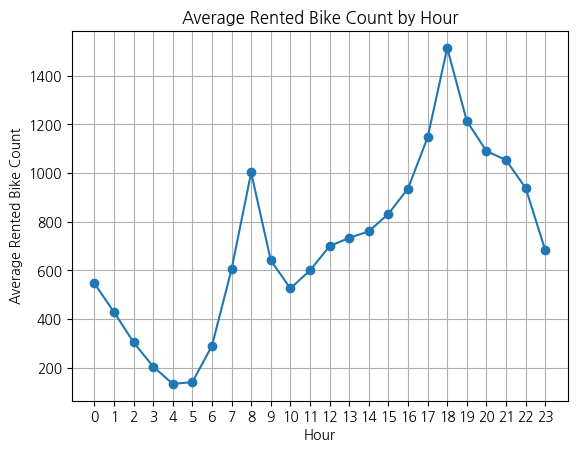

In [19]:
# 시간대별 평균 대여량
hour_mean = data_train.groupby('Hour')['Rented Bike Count'].mean()

hour_mean.plot(kind='line', marker='o')
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.xticks(range(0,24))
plt.grid(True)

Text(0.5, 1.0, 'Rented Bike Count Distribution by Hour')

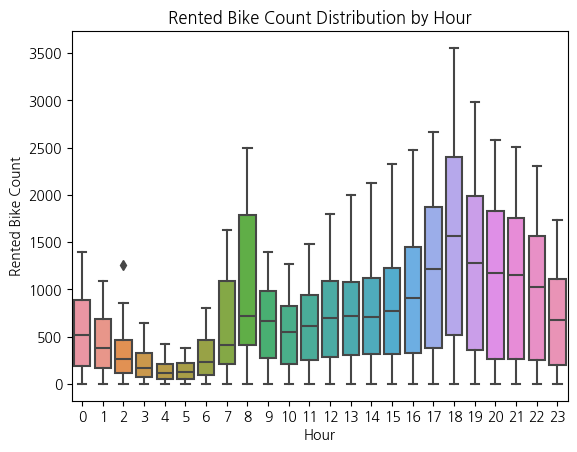

In [20]:
# 시간대별 분포
sns.boxplot(x='Hour', y='Rented Bike Count', data=data_train)
plt.title('Rented Bike Count Distribution by Hour')

Text(121.72222222222221, 0.5, 'Weekday')

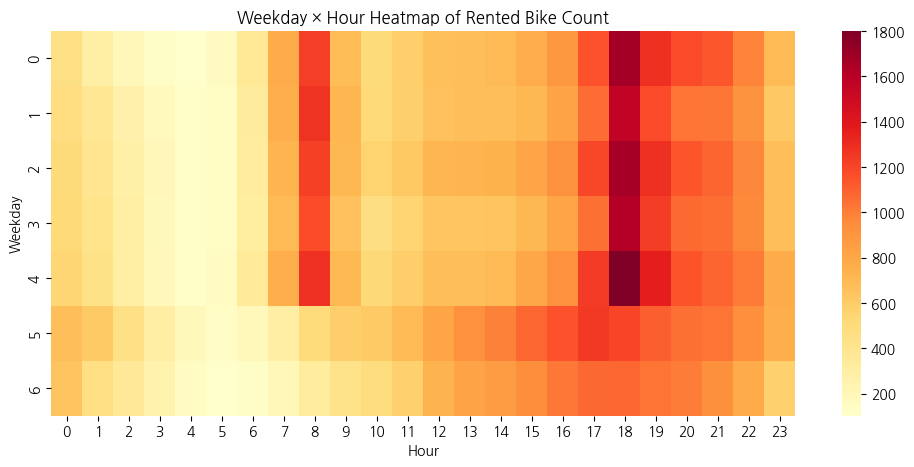

In [21]:
# Weekday x Hour
pivot_hw = data_train.pivot_table(
    values='Rented Bike Count',
    index='Weekday',
    columns='Hour',
    aggfunc='mean'
)

plt.figure(figsize=(12,5))
sns.heatmap(pivot_hw, cmap='YlOrRd')
plt.title('Weekday × Hour Heatmap of Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Weekday')

## **Temperature**
- 전반적으로 기온이 높아질수록 대여량 증가
- 10-25도 구간에서 대여량이 가장 높음
- 저온 구간(0도 이하)에서는 대여량이 매우 낮고, 고온 구간에서는 대여량 증가폭이 감소함

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Temperature')

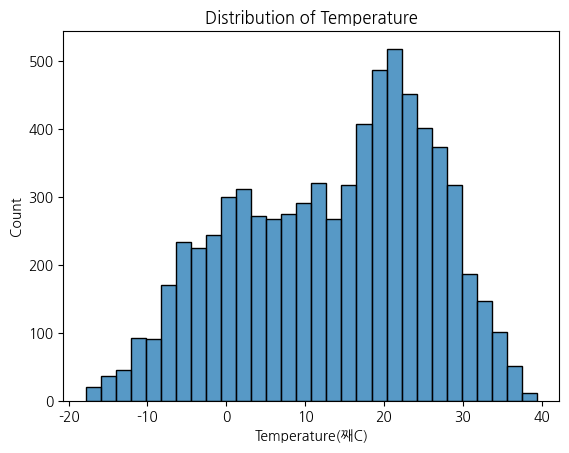

In [22]:
# 기온 분포
sns.histplot(data_train['Temperature(째C)'], bins=30)
plt.title('Distribution of Temperature')

Text(0, 0.5, 'Rented Bike Count')

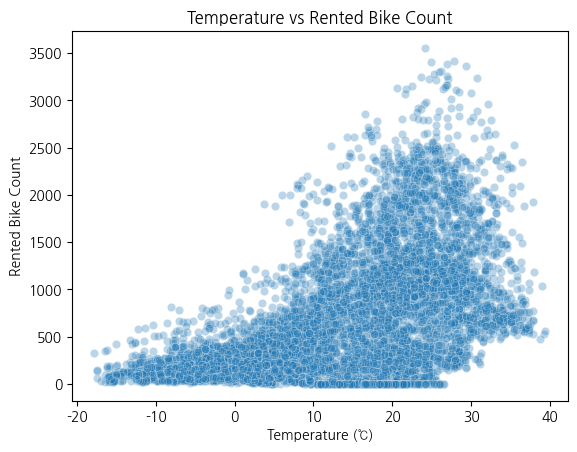

In [23]:
# Temperature x Rented Bike Count
sns.scatterplot(
    x='Temperature(째C)', 
    y='Rented Bike Count', 
    data=data_train,
    alpha=0.3
)
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature (℃)')
plt.ylabel('Rented Bike Count')

C:\Users\gyubeen\AppData\Local\Temp\ipykernel_9496\3387154951.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_mean = data_train.groupby('Temp_bin')['Rented Bike Count'].mean()


Text(0, 0.5, 'Average Rented Bike Count')

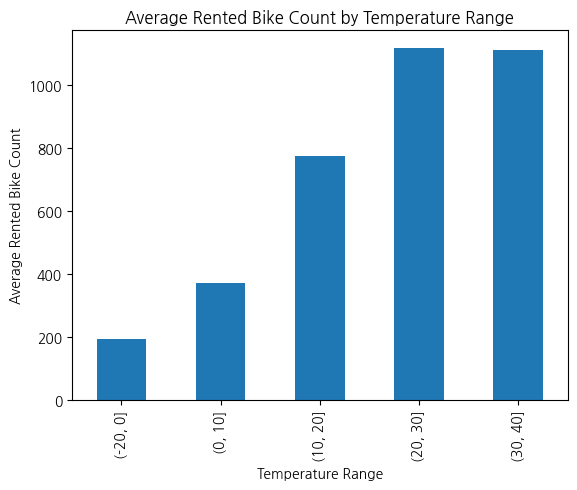

In [24]:
# 기온 구간별 평균 대여량
data_train['Temp_bin'] = pd.cut(
    data_train['Temperature(째C)'],
    bins=[-20, 0, 10, 20, 30, 40]
)

temp_mean = data_train.groupby('Temp_bin')['Rented Bike Count'].mean()

temp_mean.plot(kind='bar')
plt.title('Average Rented Bike Count by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Rented Bike Count')

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Rented Bike Count by Temperature Range')

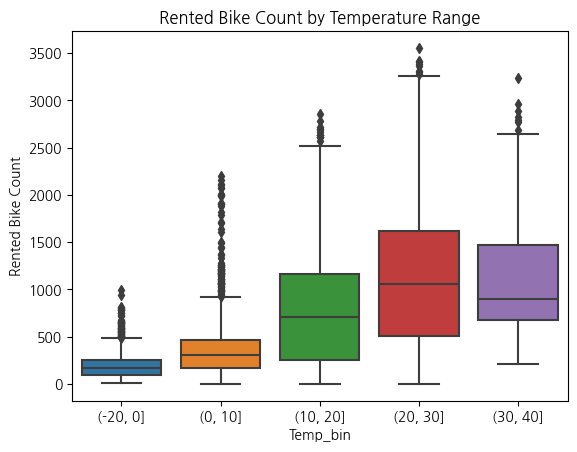

In [25]:
# 기온 구간별 대여량 분포
sns.boxplot(x='Temp_bin', y='Rented Bike Count', data=data_train)
plt.title('Rented Bike Count by Temperature Range')

## **Humidity**
- 전반적으로 습도가 증가할수록 대여량이 감소하는 경향을 보임
- 습도 40-60% 구간에서 대여량이 상대적으로 높고, 80% 이상일 때 대여량이 낮음
- 기온 10~25°C & 습도 40~60% 구간에서 대여량이 가장 높음 
- 저온 + 고습 구간에서 대여량이 가장 낮고, 고온 + 고습 구간에서도 대체적으로 낮은 편임

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Humidity')

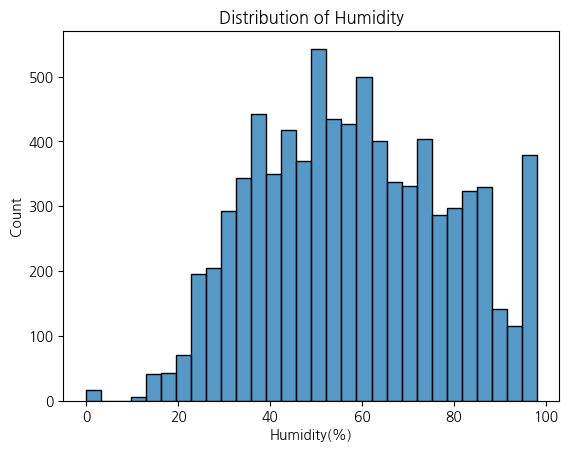

In [26]:
# 습도 분포
sns.histplot(data_train['Humidity(%)'], bins=30)
plt.title('Distribution of Humidity')

Text(0, 0.5, 'Rented Bike Count')

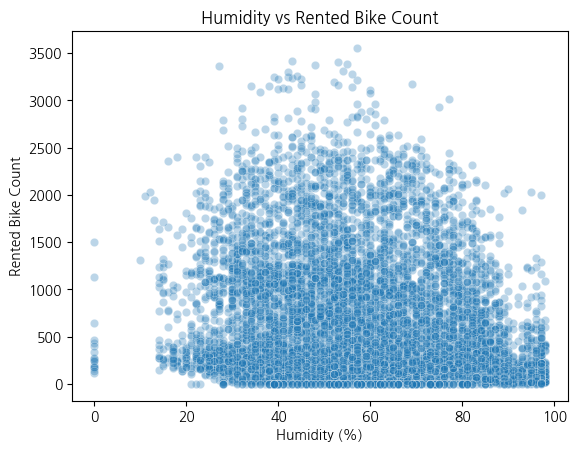

In [27]:
# Humidity x Rented Bike Count
sns.scatterplot(
    x='Humidity(%)',
    y='Rented Bike Count',
    data=data_train,
    alpha=0.3
)
plt.title('Humidity vs Rented Bike Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Rental Count by Humidity Range')

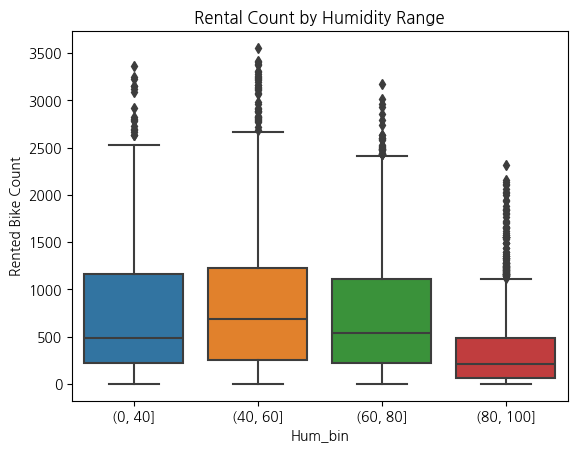

In [28]:
# 습도 구간별 대여량 분포
data_train['Hum_bin'] = pd.cut(
    data_train['Humidity(%)'],
    bins=[0, 40, 60, 80, 100]
)

sns.boxplot(x='Hum_bin', y='Rented Bike Count', data=data_train)
plt.title('Rental Count by Humidity Range')

Text(0, 0.5, 'Humidity')

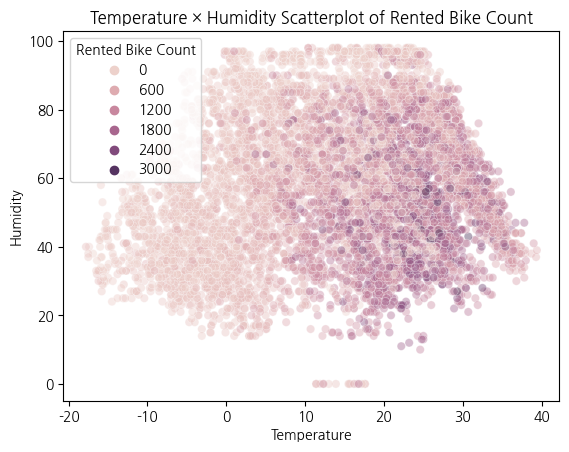

In [29]:
# Temperature x Humidity
sns.scatterplot(
    x='Temperature(째C)',
    y='Humidity(%)',
    hue='Rented Bike Count',
    data=data_train,
    alpha=0.4
)

plt.title('Temperature × Humidity Scatterplot of Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Humidity')

Text(51.722222222222214, 0.5, 'Temperature Range (°C)')

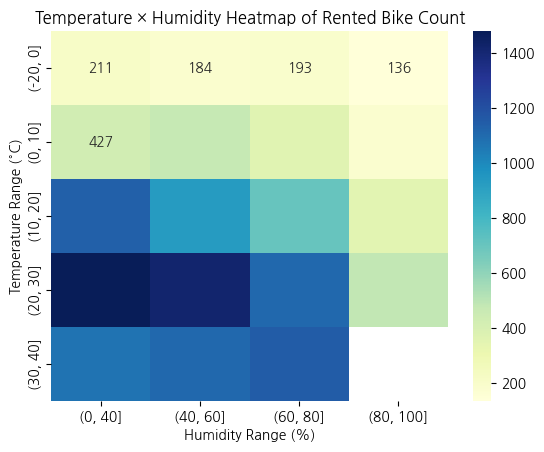

In [30]:
# Temperature x Humidity
heatmap_ht = data_train.pivot_table(
    values='Rented Bike Count',
    index='Temp_bin',
    columns='Hum_bin',
    aggfunc='mean'
)

sns.heatmap(
    heatmap_ht,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)
plt.title('Temperature × Humidity Heatmap of Rented Bike Count')
plt.xlabel('Humidity Range (%)')
plt.ylabel('Temperature Range (°C)')

## **Wind speed**
- 대부분 낮은 풍속 구간에 속함
- 풍속이 증가할수록 대여량이 감소함
- 저온 + 고풍속 구간에서 대여량이 특히 낮음

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Wind Speed')

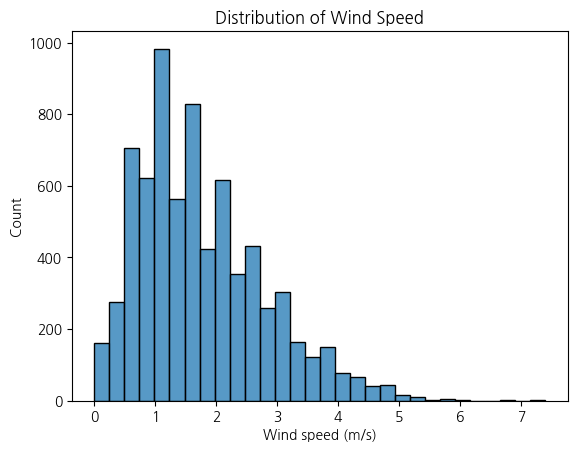

In [31]:
# 풍속 분포
sns.histplot(data_train['Wind speed (m/s)'], bins=30)
plt.title('Distribution of Wind Speed')

Text(0, 0.5, 'Rented Bike Count')

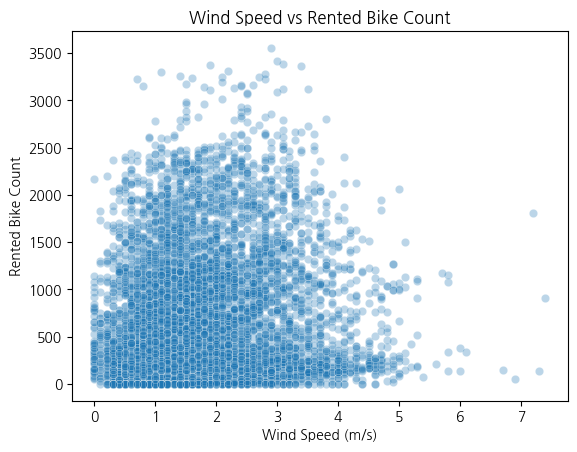

In [32]:
# Wind speed x Rented Bike Count
sns.scatterplot(
    x='Wind speed (m/s)',
    y='Rented Bike Count',
    data=data_train,
    alpha=0.3
)
plt.title('Wind Speed vs Rented Bike Count')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Wind speed')

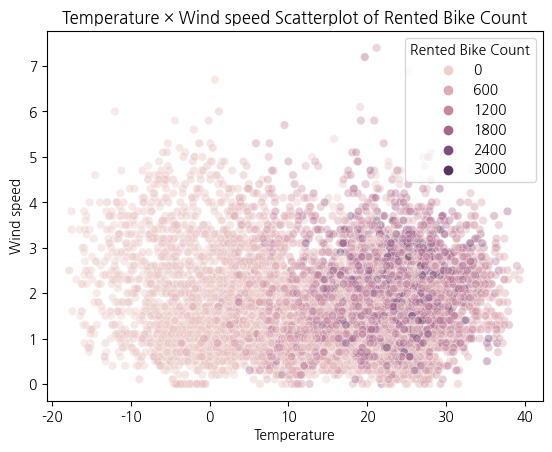

In [33]:
# Temperature x Wind speed
sns.scatterplot(
    x='Temperature(째C)',
    y='Wind speed (m/s)',
    hue='Rented Bike Count',
    data=data_train,
    alpha=0.4
)
plt.title('Temperature × Wind speed Scatterplot of Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Wind speed')

## **Visibility**
- 높은 시정 값에 데이터 집중되어 있음
- 가시거리가 매우 낮은 환경에서는 대여량이 감소하는 경향이 있으나, 일정 수준 이상에서는 대여량 차이가 크지 않음
- 시정이 500 미만일 경우 대여량이 현저히 낮고, 1000 이상일 때 대여량 차이 크지 않음

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    8040.000000
mean     1459.170896
std       603.716284
min        27.000000
25%       977.000000
50%      1741.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

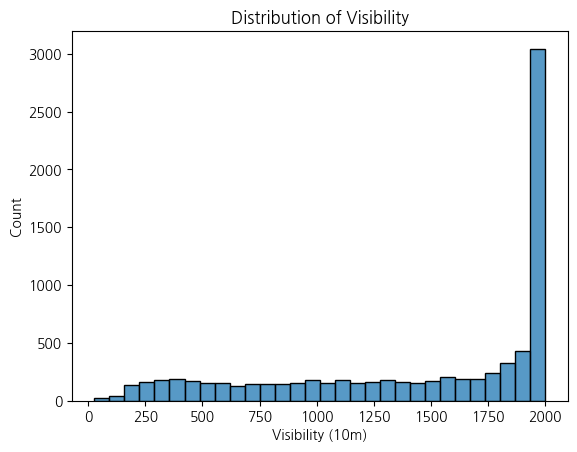

In [34]:
# 가시거리 분포
sns.histplot(data_train['Visibility (10m)'], bins=30)
plt.title('Distribution of Visibility')

data_train['Visibility (10m)'].describe()

Text(0.5, 1.0, 'Visibility vs Rented Bike Count')

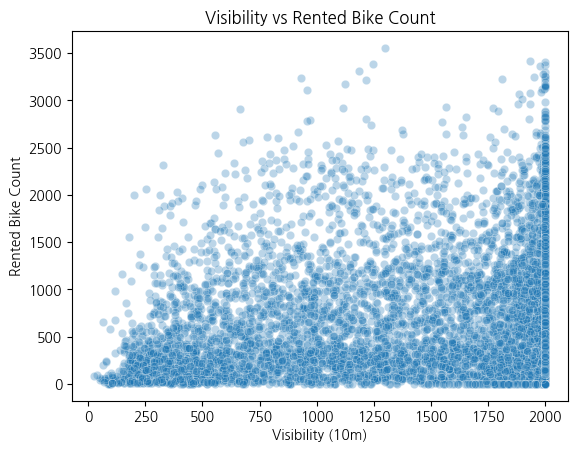

In [35]:
# Visibility x Rented Bike Count
sns.scatterplot(
    x='Visibility (10m)',
    y='Rented Bike Count',
    data=data_train,
    alpha=0.3
)
plt.title('Visibility vs Rented Bike Count')

c:\Users\gyubeen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Rental Count by Visibility Range')

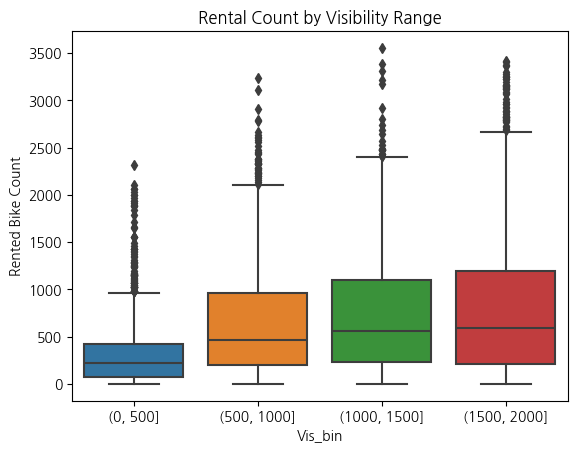

In [36]:
# 시정거리 구간별 대여량 분포
data_train['Vis_bin'] = pd.cut(
    data_train['Visibility (10m)'],
    bins=[0, 500, 1000, 1500, 2000]
)

sns.boxplot(x='Vis_bin', y='Rented Bike Count', data=data_train)
plt.title('Rental Count by Visibility Range')

## **Dew point temperature**
- 이슬점 온도 = 공기 중 수증기량을 반영하는 지표
- 이슬점이 높아질수록 대여량이 증가함

Text(0.5, 1.0, 'Dew Point Temperature Distribution')

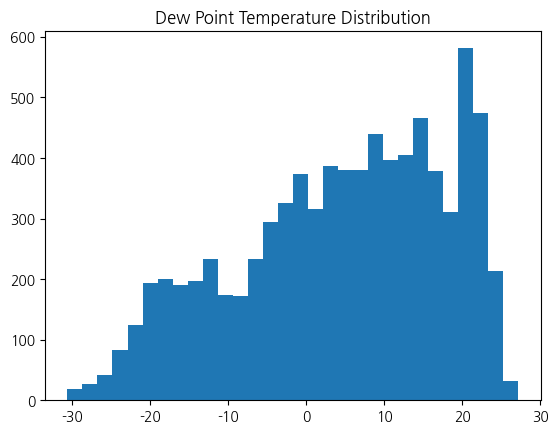

In [37]:
# 이슬점 분포
plt.hist(data_train['Dew point temperature(째C)'], bins=30)
plt.title('Dew Point Temperature Distribution')

Text(0, 0.5, 'Rented Bike Count')

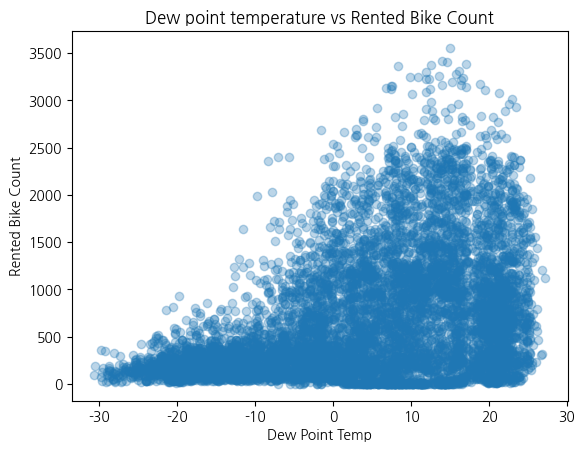

In [38]:
# Dew point temperature x Rented Bike Count
plt.scatter(data_train['Dew point temperature(째C)'],
            data_train['Rented Bike Count'], alpha=0.3)
plt.title('Dew point temperature vs Rented Bike Count')
plt.xlabel('Dew Point Temp')
plt.ylabel('Rented Bike Count')

## **Solar Radiation**
- 0 값이 압도적으로 많음 → 밤 시간대 포함 때문
- 0-5시, 19시 이후에는 거의 0이고, 10-15시 높은 편임
- 0일 경우 대여량이 전반적으로 낮고, 0.5-1.5에서 높음


Text(0.5, 1.0, 'Solar Radiation Distribution')

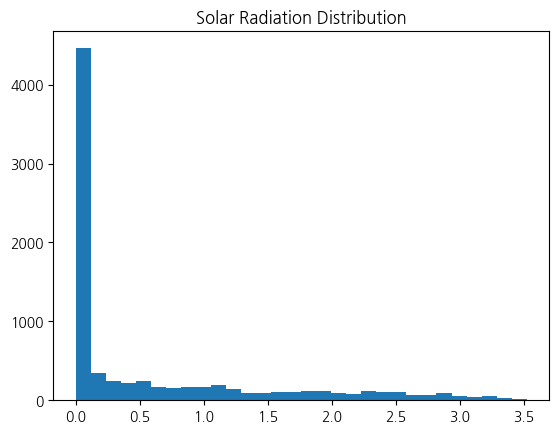

In [39]:
# 태양 복사 에너지양 분포
plt.hist(data_train['Solar Radiation (MJ/m2)'], bins=30)
plt.title('Solar Radiation Distribution')

Text(0, 0.5, 'Solar Radiation')

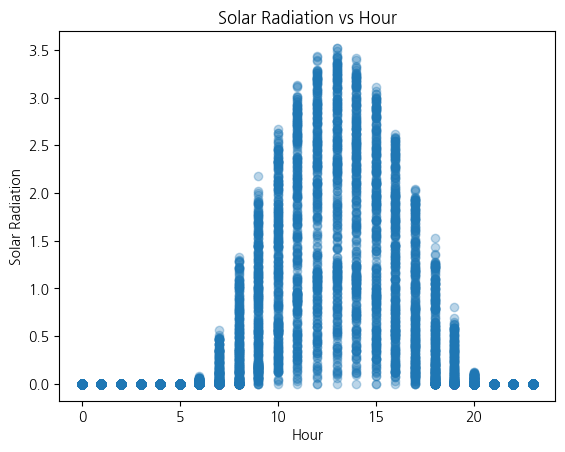

In [40]:
# Hour x Solar Radiation
plt.scatter(data_train['Hour'],
            data_train['Solar Radiation (MJ/m2)'], alpha=0.3)
plt.title('Solar Radiation vs Hour')
plt.xlabel('Hour')
plt.ylabel('Solar Radiation')

Text(0, 0.5, 'Rented Bike Count')

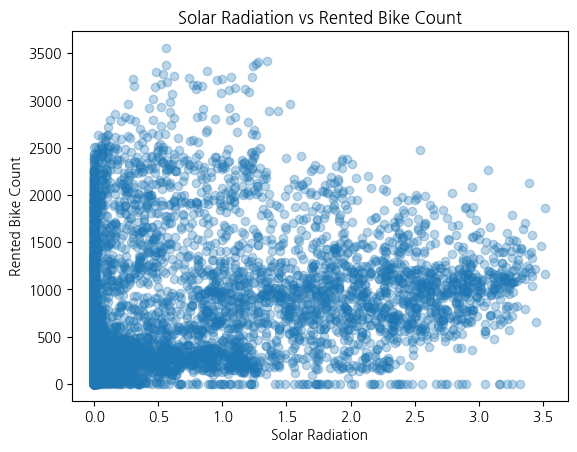

In [41]:
# Solar Radiation x Rented Bike Count
plt.scatter(data_train['Solar Radiation (MJ/m2)'],
            data_train['Rented Bike Count'], alpha=0.3)
plt.title('Solar Radiation vs Rented Bike Count')
plt.xlabel('Solar Radiation')
plt.ylabel('Rented Bike Count')

## **Rainfall**
- 0 값이 압도적으로 많음
- 소량의 비(1-3mm)에서도 대여량이 급감함

Text(0.5, 1.0, 'Rainfall Distribution')

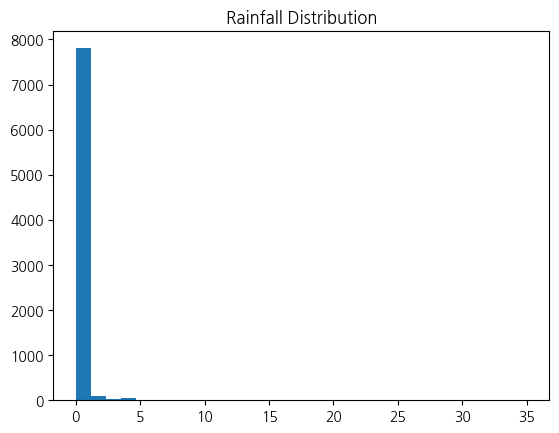

In [42]:
# 강수량 분포
plt.hist(data_train['Rainfall(mm)'], bins=30)
plt.title('Rainfall Distribution')

Text(0, 0.5, 'Rented Bike Count')

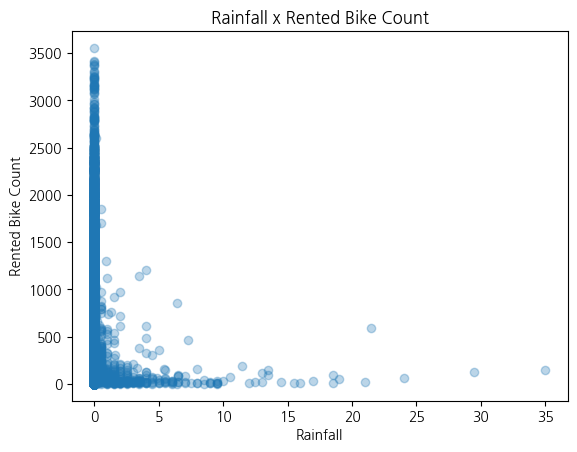

In [43]:
# Rainfall x Rented Bike Count
plt.scatter(data_train['Rainfall(mm)'],
            data_train['Rented Bike Count'], alpha=0.3)
plt.title('Rainfall x Rented Bike Count')
plt.xlabel('Rainfall')
plt.ylabel('Rented Bike Count')

In [44]:
# 강수여부 변수 생성
data_train['Rain_yn'] = (data_train['Rainfall(mm)'] > 0).astype(int)

Text(0.5, 1.0, 'Rainfall Effect')

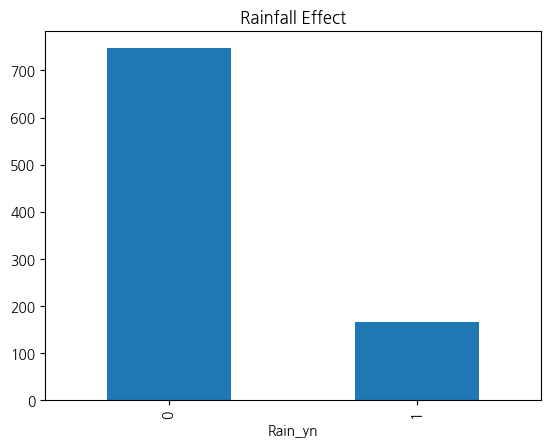

In [45]:
# 강수여부별 평균 대여량
rain_mean = data_train.groupby('Rain_yn')['Rented Bike Count'].mean()

rain_mean.plot(kind='bar')
plt.title('Rainfall Effect')

## **Snowfall**
- 0 값이 압도적으로 많음
- 소량의 눈(0-1mm)에서도 대여량이 급감함

Text(0.5, 1.0, 'Snowfall Distribution')

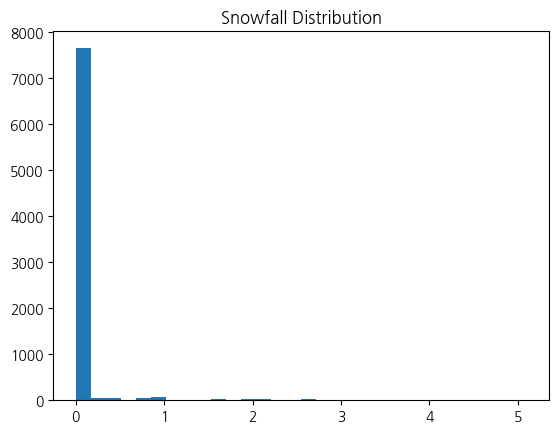

In [46]:
# 적설량 분포
plt.hist(data_train['Snowfall (cm)'], bins=30)
plt.title('Snowfall Distribution')

Text(0, 0.5, 'Rented Bike Count')

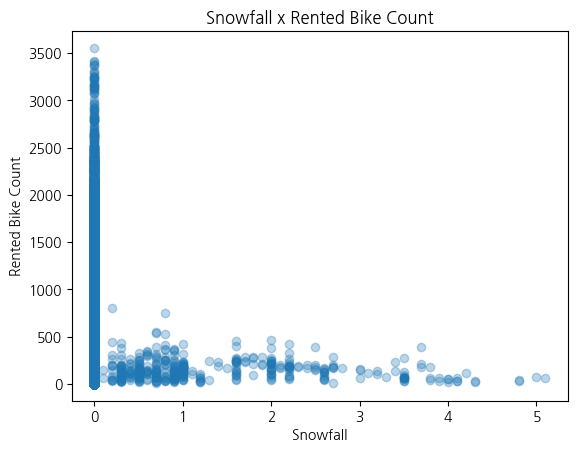

In [47]:
# Snowfall x Rented Bike Count
plt.scatter(data_train['Snowfall (cm)'],
            data_train['Rented Bike Count'], alpha=0.3)
plt.title('Snowfall x Rented Bike Count')
plt.xlabel('Snowfall')
plt.ylabel('Rented Bike Count')

In [48]:
# 적설여부 변수 생성
data_train['Snow_yn'] = (data_train['Snowfall (cm)'] > 0).astype(int)

Text(0.5, 1.0, 'Snowfall Effect')

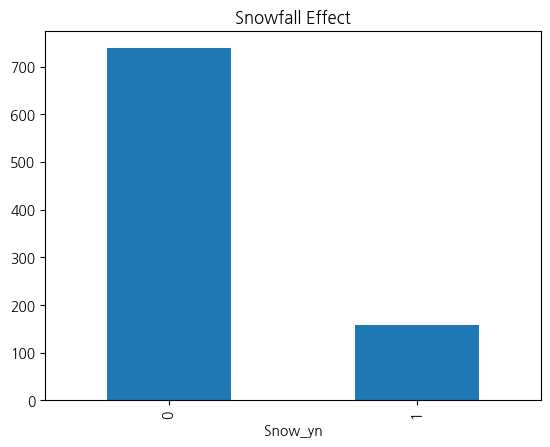

In [49]:
# 적설여부별 평균 대여량
snow_mean = data_train.groupby('Snow_yn')['Rented Bike Count'].mean()

snow_mean.plot(kind='bar')
plt.title('Snowfall Effect')

## **Seasons**
- 여름과 가을의 대여량이 높고, 겨울의 대여량이 낮음

In [50]:
# 계절별 데이터 개수
data_train['Seasons'].value_counts()

Seasons
Spring    1990
Summer    1990
Winter    1935
Autumn    1323
Name: count, dtype: int64

Seasons
Winter     226.270801
Spring     722.042211
Autumn     903.069539
Summer    1036.852261
Name: Rented Bike Count, dtype: float64

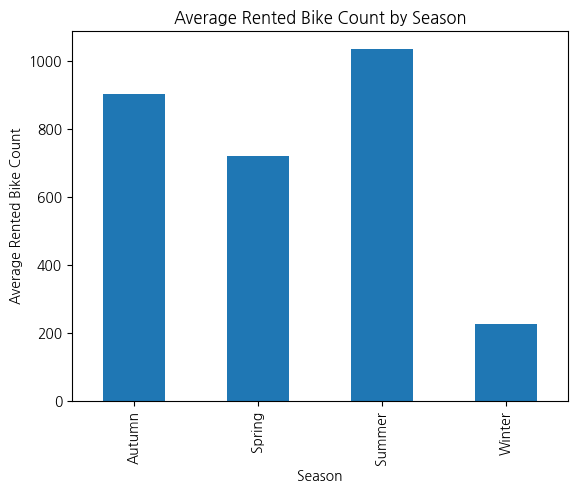

In [51]:
# 계절별 평균 대여량
season_mean = data_train.groupby('Seasons')['Rented Bike Count'].mean()

season_mean.plot(kind='bar')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')

season_mean.sort_values()

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

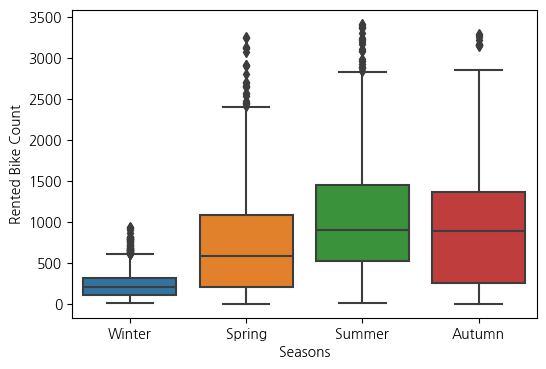

In [52]:
# Seasons x Rented Bike Count
plt.figure(figsize=(6,4))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data_train)

## **Holiday**
- 공휴일(Holiday)보다 평일(No Holiday)에 대여량이 많음
- 평일(No Holiday)에는 출퇴근 시간대에 대여량이 높고, 공휴일(Holiday)에는 낮 시간대에 높음

In [53]:
data_train['Holiday'].value_counts()

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

Text(0.5, 1.0, 'Holiday Effect')

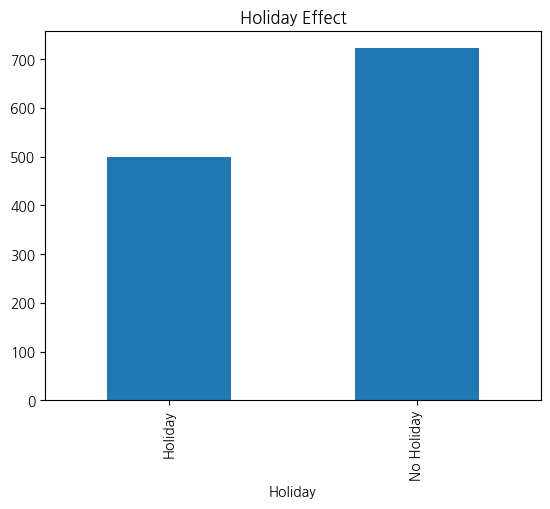

In [54]:
# 휴일 여부별 평균 대여량
holiday_mean = data_train.groupby('Holiday')['Rented Bike Count'].mean()

holiday_mean.plot(kind='bar')
plt.title('Holiday Effect')

Text(71.72222222222221, 0.5, 'Holiday')

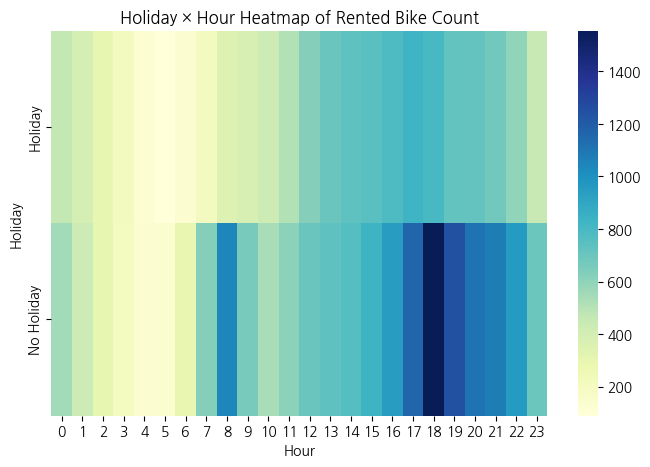

In [55]:
# Holiday x Hour
holiday_hour = (
    data_train
    .groupby(['Holiday','Hour'])['Rented Bike Count']
    .mean()
    .unstack(0)
    .sort_index()
)

plt.figure(figsize=(8,5))
sns.heatmap(
    holiday_hour.T,
    cmap='YlGnBu',
    annot=False
)
plt.title('Holiday × Hour Heatmap of Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Holiday')

## **Functioning Day**
- 운영하지 않는 날에는 대여량이 거의 0

In [56]:
data_train['Functioning Day'].value_counts()

Functioning Day
Yes    7817
No      223
Name: count, dtype: int64

Text(0.5, 1.0, 'Functioning Day Effect')

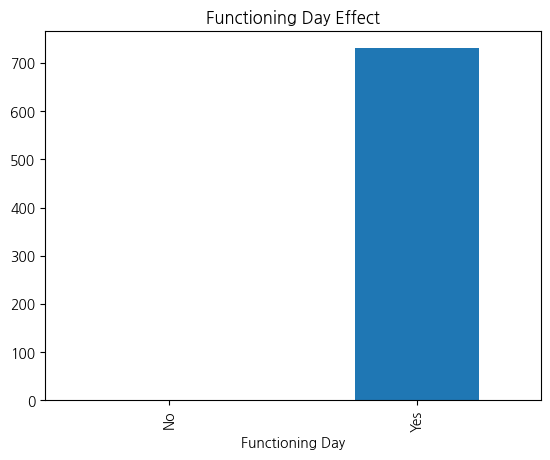

In [57]:
# 운영 여부별 평균 대여량
func_mean = data_train.groupby('Functioning Day')['Rented Bike Count'].mean()

func_mean.plot(kind='bar')
plt.title('Functioning Day Effect')

## **결측치 채우기**

In [58]:
# 결측치 개수 확인
data_train.isnull().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
Year                           0
Month                          0
Day                            0
Weekday                        0
Temp_bin                     800
Hum_bin                       17
Vis_bin                        0
Rain_yn                        0
Snow_yn                        0
dtype: int64

### **Temperature 결측치**
1.  **이슬점 공식** 이용<br>

    ![설명](이슬점공식.png)
    ![설명](이슬점공식2.png)
    - Dewpoint = 이슬점
    - T = 기온
    - RH = humidity

2. 기상청데이터 이용
    - Humidity = 0인 경우

In [59]:
# 이슬점 공식 함수 생성
def temperature_from_dewpoint_rh(dew_point, rh):
    x = (17.62 * dew_point) / (243.12 + dew_point) - np.log(rh / 100)
    temperature = (243.12 * x) / (17.62 - x)
    return temperature

In [60]:
# 이슬점 공식으로 결측치 대체
mask_tr = data_train['Temperature(째C)'].isna()

data_train.loc[mask_tr, 'Temperature(째C)'] = temperature_from_dewpoint_rh(
    data_train.loc[mask_tr, 'Dew point temperature(째C)'],
    data_train.loc[mask_tr, 'Humidity(%)']
)

c:\Users\gyubeen\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
# 결측치 개수 확인
data_train['Temperature(째C)'].isna().sum()

1

In [62]:
# 결측치 남아있는 행 1개 확인 -> Humidity=0 때문
data_train.loc[
    data_train['Temperature(째C)'].isna(),
    ['Date', 'Hour', 'Wind speed (m/s)',
     'Dew point temperature(째C)', 'Humidity(%)', 'Temperature(째C)']
]

,Date,Hour,Wind speed (m/s),Dew point temperature(째C),Humidity(%),Temperature(째C)
4131,2018-05-22,3,0.7,10.4,0,NaN


In [63]:
# 결측치 남아있는 행 기상청 데이터로 대체
# 2018-05-22 03:00 기온 15.5, 습도 72
mask_temp_na = data_train['Temperature(째C)'].isna()

data_train.loc[mask_temp_na, 'Temperature(째C)'] = 15.5
data_train.loc[mask_temp_na, 'Humidity(%)'] = 72

In [64]:
# 결측치 개수 재확인
data_train['Temperature(째C)'].isna().sum()

0

### **Humidity 결측치**
- NaN는 없으나, 0인 행 다수 존재
- 이슬점이 존재하는데 습도가 0이라는 건 물리적으로 모순
- 기상청 데이터 이용

In [65]:
# Humidity == 0인 행 확인
humidity_zero = data_train.loc[
    data_train['Humidity(%)'] == 0,
    ['Date', 'Year', 'Month', 'Day', 'Hour',
     'Temperature(째C)', 'Humidity(%)']
].copy()

display(humidity_zero)

,Date,Year,Month,Day,Hour,Temperature(째C),Humidity(%)
4063,2018-05-19,2018,5,19,7,11.4,0
4106,2018-05-21,2018,5,21,2,13.9,0
4107,2018-05-21,2018,5,21,3,13.0,0
4108,2018-05-21,2018,5,21,4,12.4,0
4109,2018-05-21,2018,5,21,5,11.9,0
4110,2018-05-21,2018,5,21,6,11.4,0
4111,2018-05-21,2018,5,21,7,12.3,0
4132,2018-05-22,2018,5,22,4,15.6,0
4133,2018-05-22,2018,5,22,5,15.7,0
4134,2018-05-22,2018,5,22,6,15.5,0


In [66]:
# 기상청 데이터 불러오기
asos_humidity = pd.read_csv('asos_humidity.csv', encoding='cp949')
asos_humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      240 non-null    int64  
 1   지점명     240 non-null    object 
 2   일시      240 non-null    object 
 3   기온(°C)  240 non-null    float64
 4   습도(%)   240 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.5+ KB


In [67]:
# 기상청 데이터 확인
display(asos_humidity.head())
display(asos_humidity.tail())
print(asos_humidity.columns)

,지점,지점명,일시,기온(°C),습도(%)
0,108,서울,2018-05-19 01:00,11.4,74
1,108,서울,2018-05-19 02:00,11.1,74
2,108,서울,2018-05-19 03:00,10.7,73
3,108,서울,2018-05-19 04:00,10.5,73
4,108,서울,2018-05-19 05:00,10.4,71


,지점,지점명,일시,기온(°C),습도(%)
235,108,서울,2018-05-28 20:00,23.0,49
236,108,서울,2018-05-28 21:00,21.8,50
237,108,서울,2018-05-28 22:00,21.1,54
238,108,서울,2018-05-28 23:00,20.9,53
239,108,서울,2018-05-29 00:00,20.6,54


Index(['지점', '지점명', '일시', '기온(°C)', '습도(%)'], dtype='object')


In [68]:
# 불필요한 컬럼 제거 & 컬럼명 변경
asos_humidity = asos_humidity.rename(columns={
    '일시': 'DateTime',
    '습도(%)': 'asos_hum'
})
asos_humidity = asos_humidity[['DateTime', 'asos_hum']]

In [69]:
# datetime 변경 & 변수 생성
asos_humidity['DateTime'] = pd.to_datetime(asos_humidity['DateTime'])
asos_humidity['Date'] = asos_humidity['DateTime'].dt.date
asos_humidity['Hour'] = asos_humidity['DateTime'].dt.hour
asos_humidity = asos_humidity[['Date', 'Hour', 'asos_hum']]

In [70]:
# train 데이터 datetime 변경 (형식 통일)
data_train['Date'] = pd.to_datetime(data_train['Date']).dt.date

In [71]:
# Humidity == 0인 행 교체
data_train = data_train.merge(asos_humidity, on=['Date', 'Hour'], how='left')

mask0 = (data_train['Humidity(%)'] == 0)
data_train.loc[mask0, 'Humidity(%)'] = data_train.loc[mask0, 'asos_hum']

data_train.drop(columns=['asos_hum'], inplace=True)

In [72]:
# 교체여부 확인
(data_train['Humidity(%)'] == 0).sum()

0

### **Wind speed 결측치**
1. **기상청 데이터** 이용

   - https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
   - https://www.weather.go.kr/w/resources/pdf/kma_data_portal_guide.pdf

   - 이 데이터로 결측치를 채우기 적절한지 판단하기 위해 2가지 정도 생각해볼 수 있다.<br>
      (1) 결측치를 제외한 나머지 값들이 모두 동일한가?<br>
      (2) 결측치 부분에 적절한 값이 들어가 있는가?

2. 월별 중앙값
   - 풍속은 계절성 + 일변화가 강함

In [73]:
# 결측치 개수 확인
data_train['Wind speed (m/s)'].isna().sum()

802

In [74]:
# 기상청 데이터 불어오기
asos_wind = pd.read_csv('asos_wind.csv', encoding='cp949')
asos_wind.columns

Index(['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)'], dtype='object')

In [75]:
# 기상청 데이터 확인 & train 데이터 비교
display(asos_wind.head())
display(data_train.head())
print(asos_wind.columns)

,지점,지점명,일시,기온(°C),풍속(m/s)
0,108,서울,2017-12-01 00:00,-5.2,2.2
1,108,서울,2017-12-01 01:00,-5.5,0.8
2,108,서울,2017-12-01 02:00,-6.0,1.0
3,108,서울,2017-12-01 03:00,-6.2,0.9
4,108,서울,2017-12-01 04:00,-6.0,2.3


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,Year,Month,Day,Weekday,Temp_bin,Hum_bin,Vis_bin,Rain_yn,Snow_yn
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,4,"(-20, 0]","(0, 40]","(1500, 2000]",0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,4,"(-20, 0]","(0, 40]","(1500, 2000]",0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,2017,12,1,4,"(-20, 0]","(0, 40]","(1500, 2000]",0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,4,"(-20, 0]","(0, 40]","(1500, 2000]",0,0
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,...,Yes,2017,12,1,4,"(-20, 0]","(0, 40]","(1500, 2000]",0,0


Index(['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)'], dtype='object')


In [76]:
# 불필요한 컬럼 제거 & 컬럼명 변경
asos_wind = asos_wind.rename(columns={
    '일시': 'DateTime',
    '풍속(m/s)': 'asos_wind'
})
asos_wind = asos_wind[['DateTime', 'asos_wind']]

In [77]:
# datetime 변경 & 변수 생성
asos_wind['DateTime'] = pd.to_datetime(asos_wind['DateTime'])
asos_wind['Date'] = asos_wind['DateTime'].dt.date
asos_wind['Hour'] = asos_wind['DateTime'].dt.hour
asos_wind = asos_wind[['Date', 'Hour', 'asos_wind']]

In [78]:
# train 데이터 datetime 변경 (형식 통일)
# data_train['Date'] = pd.to_datetime(data_train['Date']).dt.date

In [79]:
# 결측치 채우기
data_train = data_train.merge(asos_wind, on=['Date', 'Hour'], how='left')

mask_ws = data_train['Wind speed (m/s)'].isna()
data_train.loc[mask_ws, 'Wind speed (m/s)'] = data_train.loc[mask_ws, 'asos_wind']

data_train.drop(columns=['asos_wind'], inplace=True)


In [80]:
# 결측치 개수 확인
data_train['Wind speed (m/s)'].isna().sum()

2

In [81]:
# 결측치 남아있는 행 2개 확인 -> asos_wind NaN 때문
data_train.loc[
    data_train['Wind speed (m/s)'].isna(),
    ['Date', 'Year', 'Month', 'Day', 'Hour', 'Wind speed (m/s)']
]

,Date,Year,Month,Day,Hour,Wind speed (m/s)
118,2017-12-05,2017,12,5,22,NaN
129,2017-12-06,2017,12,6,9,NaN


In [82]:
# 월별 중앙값으로 대체
mask_ws = data_train['Wind speed (m/s)'].isna()

data_train.loc[mask_ws, 'Wind speed (m/s)'] = (
    data_train.groupby('Month')['Wind speed (m/s)']
    .transform('median')
    .loc[mask_ws]
)

In [83]:
# 결측치 개수 재확인
data_train['Wind speed (m/s)'].isna().sum()

0

### **Seasons 결측치**
- 봄 : 3-5월
- 여름 : 6-8월 
- 가을 : 9-11월
- 겨울 : 12-2월

In [84]:
# Month별 Seasons 분포
pd.crosstab(
    data_train['Month'],
    data_train['Seasons'],
    dropna=False
)

Seasons,Autumn,Spring,Summer,Winter,NaN
Month,,,,,
1,0,0,0,660,84
2,0,0,0,611,61
3,0,677,0,0,67
4,0,643,0,0,77
5,0,670,0,0,74
6,0,0,645,0,75
7,0,0,680,0,64
8,0,0,665,0,79
9,650,0,0,0,70


In [85]:
# 월 -> Season 매핑
month_to_season = {
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn',
    12: 'Winter', 1: 'Winter', 2: 'Winter'
}

In [86]:
# 결측치 채우기
data_train['Seasons'] = data_train['Seasons'].fillna(
    data_train['Month'].map(month_to_season)
)

In [87]:
# 결측치 제거 확인
data_train['Seasons'].isna().sum()

0

## **변수 선택**

In [88]:
# train 데이터 컬럼명
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'Weekday',
       'Temp_bin', 'Hum_bin', 'Vis_bin', 'Rain_yn', 'Snow_yn'],
      dtype='object')

In [89]:
# train 데이터 변수 제거
drop_cols_train = [
    'Date',
    'Temp_bin', 'Hum_bin', 'Vis_bin',
    'Rainfall(mm)', 'Snowfall (cm)'
]

data_train = data_train.drop(columns=drop_cols_train)

In [90]:
# trian 데이터 변수 저장
train_features = data_train.columns.tolist()

## **test 데이터 전처리**

### **파생변수 생성**
- **Date** → Year, Month, Day, Weekday
- **Rainfall** → Rain_yn 생성
- **Snowfall** → Snow_yn 생성

In [91]:
# train에는 있는데 test에는 없는 컬럼
set(train_features) - set(data_test.columns)

{'Day', 'Month', 'Rain_yn', 'Rented Bike Count', 'Snow_yn', 'Weekday', 'Year'}

In [92]:
# datetime 변환 & 파생변수 생성
data_test['Date'] = pd.to_datetime(data_test['Date'], format='%d/%m/%Y')

data_test['Year'] = data_test['Date'].dt.year
data_test['Month'] = data_test['Date'].dt.month
data_test['Day'] = data_test['Date'].dt.day
data_test['Weekday'] = data_test['Date'].dt.weekday

In [93]:
# 강수여부 변수 생성
data_test['Rain_yn'] = (data_test['Rainfall(mm)'] > 0).astype(int)

In [94]:
# 적설여부 변수 생성
data_test['Snow_yn'] = (data_test['Snowfall (cm)'] > 0).astype(int)

### **결측치 채우기**
- **Temperature** → 이슬점 공식 이용
- **Wind speed** → 기상청 데이터 이용
- **Seasons** → 월별로 나누기

In [95]:
# 결측치 개수 확인
data_test.isnull().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
Year                          0
Month                         0
Day                           0
Weekday                       0
Rain_yn                       0
Snow_yn                       0
dtype: int64

In [96]:
# 날짜 범위 확인
print(data_test['Date'].min(), "~", data_test['Date'].max())

2018-11-01 00:00:00 ~ 2018-11-30 00:00:00


In [97]:
# Temperature
mask_ts = data_test['Temperature(째C)'].isna()

data_test.loc[mask_ts, 'Temperature(째C)'] = temperature_from_dewpoint_rh(
    data_test.loc[mask_ts, 'Dew point temperature(째C)'],
    data_test.loc[mask_ts, 'Humidity(%)']
)

data_test['Temperature(째C)'].isna().sum()

0

In [98]:
# Wind speed
asos_wind_ts = pd.read_csv('asos_wind_ts.csv', encoding='cp949')

asos_wind_ts = asos_wind_ts.rename(columns={
    '일시': 'DateTime',
    '풍속(m/s)': 'asos_wind'
})
asos_wind_ts = asos_wind_ts[['DateTime', 'asos_wind']]

asos_wind_ts['DateTime'] = pd.to_datetime(asos_wind_ts['DateTime'])
asos_wind_ts['Date'] = asos_wind_ts['DateTime'].dt.date
asos_wind_ts['Hour'] = asos_wind_ts['DateTime'].dt.hour
asos_wind_ts = asos_wind_ts[['Date', 'Hour', 'asos_wind']]

data_test['Date'] = pd.to_datetime(data_test['Date']).dt.date

data_test = data_test.merge(asos_wind_ts, on=['Date', 'Hour'], how='left')

mask_ws2 = data_test['Wind speed (m/s)'].isna()
data_test.loc[mask_ws2, 'Wind speed (m/s)'] = data_test.loc[mask_ws2, 'asos_wind']

data_test.drop(columns=['asos_wind'], inplace=True)

data_test['Wind speed (m/s)'].isna().sum()

0

In [99]:
# Seasons
data_test['Seasons'] = data_test['Seasons'].fillna(
    data_test['Month'].map(month_to_season)
)

data_test['Seasons'].isna().sum()

0

### **변수 제거**

In [100]:
# test에는 있는데 train에는 없는 컬럼
set(data_test.columns) - set(train_features)

{'Date', 'Rainfall(mm)', 'Snowfall (cm)'}

In [101]:
# test 데이터 변수 제거
drop_cols_test = [
    'Date',
    'Rainfall(mm)', 'Snowfall (cm)'
]

data_test = data_test.drop(columns=drop_cols_test)

In [102]:
display(data_test.head())
display(data_test.tail())

,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekday,Rain_yn,Snow_yn
0,0,5.7,62,2.3,1909,-1.0,0.0,Autumn,No Holiday,Yes,2018,11,1,3,0,0
1,1,5.1,65,1.6,1932,-0.9,0.0,Autumn,No Holiday,Yes,2018,11,1,3,0,0
2,2,4.4,64,1.4,2000,-1.8,0.0,Autumn,No Holiday,Yes,2018,11,1,3,0,0
3,3,4.2,65,0.7,1962,-1.8,0.0,Autumn,No Holiday,Yes,2018,11,1,3,0,0
4,4,3.6,70,0.8,1934,-1.3,0.0,Autumn,No Holiday,Yes,2018,11,1,3,0,0


,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekday,Rain_yn,Snow_yn
715,19,4.2,34,2.6,1894,-10.3,0.0,Autumn,No Holiday,Yes,2018,11,30,4,0,0
716,20,3.4,37,2.3,2000,-9.9,0.0,Autumn,No Holiday,Yes,2018,11,30,4,0,0
717,21,2.6,39,0.3,1968,-9.9,0.0,Autumn,No Holiday,Yes,2018,11,30,4,0,0
718,22,2.1,41,1.0,1859,-9.8,0.0,Autumn,No Holiday,Yes,2018,11,30,4,0,0
719,23,1.9,43,1.3,1909,-9.3,0.0,Autumn,No Holiday,Yes,2018,11,30,4,0,0


# **모델링**

## **모델 비교** - Gradient Boosting vs RandomForest

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [104]:
# train 데이터, test 데이터 분할
X_train = data_train.drop(columns=['Rented Bike Count']).copy()
Y_train = data_train['Rented Bike Count'].copy()

X_test = data_test.copy()

In [105]:
# 범주형 변수 One-hot 인코딩 + train 기준으로 test 컬럼 맞추기
cols_ohe = ['Seasons','Holiday','Functioning Day','Rain_yn','Snow_yn']

X_train = pd.get_dummies(X_train, columns=cols_ohe, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_ohe, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [106]:
# train 데이터, valid 데이터 분할
X_tr, X_val, Y_tr, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42
)

In [107]:
# 평가 함수
def eval_regression(model):
    Y_tr_pred = model.predict(X_tr)
    Y_val_pred = model.predict(X_val)
    
    print('학습 능력')
    print('R Square : ', r2_score(Y_tr, Y_tr_pred))
    print('RMSE : ', np.sqrt(mean_squared_error(Y_tr, Y_tr_pred)))
    
    print('일반화 능력')
    print('R Square : ', r2_score(Y_val, Y_val_pred))
    print('RMSE : ', np.sqrt(mean_squared_error(Y_val, Y_val_pred)))

In [108]:
# 학습 수행
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

gbr.fit(X_tr, Y_tr)
rf.fit(X_tr, Y_tr)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [109]:
# Gradient Boosting Regressor 성능
eval_regression(gbr)

학습 능력
R Square :  0.8975491777239315
RMSE :  209.97102990784143
일반화 능력
R Square :  0.8968696704805342
RMSE :  212.70392697845446


In [110]:
# RandomForest Regressor 성능
eval_regression(rf)

학습 능력
R Square :  0.9911527084251043
RMSE :  61.703077352288815
일반화 능력
R Square :  0.9327312419890929
RMSE :  171.7864915213618


**모델 선택 및 성능 비교**

| Model | Valid R² | Valid RMSE |
|---|---:|---:|
| Gradient Boosting Regressor | 0.897 | 212.7 |
| RandomForest Regressor | **0.933** | **171.8** |

RandomForest는 Gradient Boosting보다 높은 설명력(R²)과 낮은 예측 오차(RMSE)를 보여줌<br>

=> **RandomForest Regressor** 최종 예측 모델


## **RandomForest Regressor**
1. **선택 이유**
- 시간대, 요일, 계절, 기온 및 강수 여부 등 다양한 요인에 따라 **비선형적 변화**
- 이러한 데이터 특성을 고려하여, 비선형 관계를 효과적으로 학습하는 앙상블 모델 선정
- 앙상블 모델 중 일반화 성능이 더 우수한 RandomForest 선정 

2. **특징**
- 여러 개의 결정트리를 학습한 뒤, 각 트리의 예측값을 평균하여 최종 예측값을 산출하는 모델
- 비선형 관계 학습에 강함 (시간, 기상, 계절 변수의 복잡한 패턴 반영 가능)
- 과적합에 비교적 강건함
- 이상치 및 극단값에 대한 안정성 (폭우, 폭설, 야간 시간대)
- 데이터 전처리에 대한 유연성 (Scaling 필수 X)

3. **다른 모델과의 비교**
- 선형회귀 / 다항회귀 : 비선형, 상호작용 반영 어려움
- 규제 선형회귀(L1/L2/ElasticNet) : 고차 패턴 학습 한계

4. **주요 하이퍼파라미터**
- n_estimators : 트리 개수
- max_depth : 트리 최대 깊이
- min_samples_leaf : 리프 노드 최소 샘플 수
- min_samples_split : 분기 최소 샘플 수
- max_features : 각 분기에서 고려할 변수 비율
- bootstrap : 부트스트랩 샘플링 사용 여부

In [111]:
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling
from sklearn.model_selection import GridSearchCV

In [112]:
# 파이프라인 구조 설계
model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),          # 결측치 처리
    RandomForestRegressor(random_state=1234)   # 학습 모델
)
model_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1234))])

In [113]:
# 하이퍼파라미터 튜닝 및 교차검증

# 하이퍼 파라미터 범위 설정
hyperparam = {
    'randomforestregressor__n_estimators': [300, 500],
    'randomforestregressor__max_depth': [None, 20],
    'randomforestregressor__min_samples_leaf': [1, 2],
    'randomforestregressor__max_features': ['sqrt']
}

# GridSearchCV
grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='neg_root_mean_squared_error', n_jobs=-1)

# 학습
grid_model1.fit(X_train, Y_train)

# 최적 모델 추출
best_model1 = grid_model1.best_estimator_

In [114]:
best_model1

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       n_estimators=500, random_state=1234))])

In [115]:
# 학습 수행
best_model1.fit(X_tr,Y_tr)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       n_estimators=500, random_state=1234))])

In [116]:
# 평가
eval_regression(best_model1)

학습 능력
R Square :  0.9869242619276098
RMSE :  75.01269356426315
일반화 능력
R Square :  0.9167103336331087
RMSE :  191.15156873450366


## **성능 높이기**

### **변수 제거**
- Year, Day

In [117]:
drop_cols = ['Year', 'Day']

X_train = X_train.drop(columns=drop_cols)
X_tr    = X_tr.drop(columns=drop_cols)
X_val   = X_val.drop(columns=drop_cols)
X_test  = X_test.drop(columns=drop_cols)

### **하이퍼파라미터 튜닝**

In [118]:
hyperparam = {
    'randomforestregressor__n_estimators': [500, 800],
    'randomforestregressor__max_depth': [None, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5],
    'randomforestregressor__min_samples_leaf': [1, 2],
    'randomforestregressor__max_features': ['sqrt', 0.7],
    'randomforestregressor__bootstrap': [True]
}

grid_model2 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_model2.fit(X_train, Y_train)

best_model2 = grid_model2.best_estimator_

In [119]:
best_model2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features=0.7,
                                       n_estimators=500, random_state=1234))])

In [120]:
# 학습 수행
best_model2.fit(X_tr,Y_tr)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features=0.7,
                                       n_estimators=500, random_state=1234))])

In [121]:
# 평가
eval_regression(best_model2)

학습 능력
R Square :  0.9911060461521783
RMSE :  61.865580160194426
일반화 능력
R Square :  0.9357494709859663
RMSE :  167.88838800634727


**최종 모델 성능 평가**

1. **학습 성능 (Train)**

- R²: 0.991
- RMSE: 61.87
 
    => 학습 데이터에 대해 높은 설명력을 보이며, 대여량 패턴을 충분히 학습했음을 확인할 수 있음

 2. **검증 성능 (Validation)**
 
- R²: 0.936
- RMSE: 167.89

    => 검증 데이터에서 높은 R²와 비교적 낮은 RMSE를 보여, 안정적인 일반화 성능을 보임을 확인함

# **예측하기**

In [122]:
# 학습 수행
best_model2.fit(X_train, Y_train)

# test 예측
Y_test_pred = best_model2.predict(X_test)

# 원본 test 다시 불러오기
raw_test = pd.read_csv('test.csv')

# 예측값 결합
final = raw_test.copy()
final['Predicted_Rented_Bike_Count'] = Y_test_pred.round().astype(int)

display(final.head())

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Predicted_Rented_Bike_Count
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,423
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,375
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,275
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,182
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,145


In [123]:
# 파일 내보내기
final.to_csv('bike_prediction.csv', index=False)